# Blockchain data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

## Bitcoin blockchain, what's in a block?

APIs are available to retrieve the blockchain data like [blockchain.com](https://www.blockchain.com/explorer?utm_campaign=expnav_explorer)

In [6]:
r = requests.get('https://blockchain.info/rawblock/1')
block = dict(r.json())
block
# ["tx"]
# ["hash"]

{'hash': '00000000839a8e6886ab5951d76f411475428afc90947ee320161bbf18eb6048',
 'ver': 1,
 'prev_block': '000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f',
 'mrkl_root': '0e3e2357e806b6cdb1f70b54c3a3a17b6714ee1f0e68bebb44a74b1efd512098',
 'time': 1231469665,
 'bits': 486604799,
 'next_block': ['000000006a625f06636b8bb6ac7b960a8d03705d1ace08b1a19da3fdcc99ddbd'],
 'fee': 0,
 'nonce': 2573394689,
 'n_tx': 1,
 'size': 215,
 'block_index': 1,
 'main_chain': True,
 'height': 1,
 'weight': 860,
 'tx': [{'hash': '0e3e2357e806b6cdb1f70b54c3a3a17b6714ee1f0e68bebb44a74b1efd512098',
   'ver': 1,
   'vin_sz': 1,
   'vout_sz': 1,
   'size': 134,
   'weight': 536,
   'fee': 0,
   'relayed_by': '0.0.0.0',
   'lock_time': 0,
   'tx_index': 5352466621385076,
   'double_spend': False,
   'time': 1231469665,
   'block_index': 1,
   'block_height': 1,
   'inputs': [{'sequence': 4294967295,
     'witness': '',
     'script': '04ffff001d0104',
     'index': 0,
     'prev_out': None}],
   'out'

## Bitcoin price index

We are going to download the bitcoin exchange rate information to USD and make some plots. Let us start with the bitcoin prices. The data is retrieved from the website [blockchain.com](https://www.blockchain.com/charts)

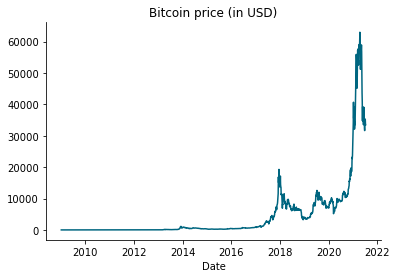

In [7]:
import datetime
with open('../Data/market-price.json') as f:
    exchange_rate = json.load(f)
exchange_rate_data = dict(exchange_rate)
exchange_rate_df = pd.DataFrame.from_records(exchange_rate_data["values"])
exchange_rate_df['Date'] = np.array([datetime.datetime(1970, 1, 1) + datetime.timedelta(seconds=int(exchange_rate_df["x"].iloc[k])) for k in range(len(exchange_rate_df["x"]))])
exchange_rate_df


fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(exchange_rate_df['Date'], exchange_rate_df['y'], color=(0,0.4,0.5))
ax.set_xlabel('Date')
ax.set_title('Bitcoin price (in USD)')
sns.despine()
plt.savefig("../Figures/btc_price.pdf")

## Bitcoin Network Hashrate

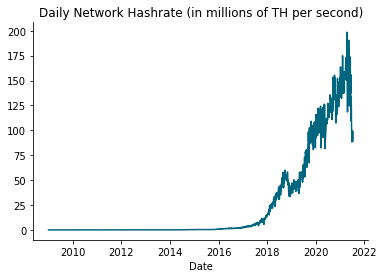

In [8]:
with open('../Data/hash-rate.json') as f:
    hash_rate = json.load(f)

hash_rate_data = dict(hash_rate)
hash_rate_df = pd.DataFrame.from_records(hash_rate_data["values"])
hash_rate_df['Date'] = np.array([datetime.datetime(1970, 1, 1) + datetime.timedelta(seconds=int(hash_rate_df["x"].iloc[k])) for k in range(len(hash_rate_df["x"]))])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(hash_rate_df['Date'], hash_rate_df['y'] / 1e6, color=(0,0.4,0.5))
ax.set_xlabel('Date')
ax.set_title('Daily Network Hashrate (in millions of TH per second)')
sns.despine()
plt.savefig("../Figures/btc_hahsrate.pdf")

## Number of transactions 

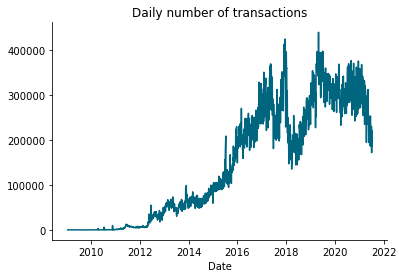

In [9]:
with open('../Data/n-transactions.json') as f:
    n_transaction = json.load(f)

n_transaction_data = dict(n_transaction)
n_transaction_df = pd.DataFrame.from_records(n_transaction_data["values"])
n_transaction_df['Date'] = np.array([datetime.datetime(1970, 1, 1) + datetime.timedelta(seconds=int(n_transaction_df["x"].iloc[k])) for k in range(len(n_transaction_df["x"]))])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_transaction_df['Date'], n_transaction_df['y'], color=(0,0.4,0.5))
ax.set_xlabel('Date')
ax.set_title('Daily number of transactions')
sns.despine()
plt.savefig("../Figures/btc_n_transaction.pdf")

## Bitcoin Network Electricity consumption

The electricity consumption of the bitcoin network is estimated by the Cambridge Bitcoin Electricity Consumption Index [CBECI](https://cbeci.org/)

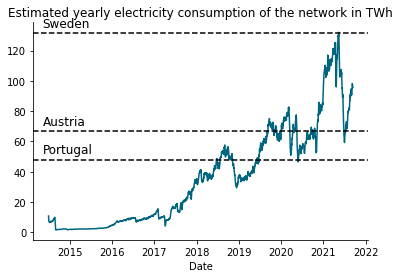

In [10]:
elec_conso_df = pd.read_csv("../Data/BTC_electricity_consumption.csv")

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(pd.to_datetime(elec_conso_df['Date and Time']), elec_conso_df['GUESS'], color=(0,0.4,0.5))
ax.axhline(y=48, color = "black", linestyle = "--")
ax.text(16200, 52, "Portugal", fontsize=12)
ax.axhline(y=66.85, color = "black", linestyle = "--")
ax.text(16200, 70.85, "Austria", fontsize=12)
ax.axhline(y=131.8, color = "black", linestyle = "--")
ax.text(16200, 135.8, "Sweden", fontsize=12)
ax.set_xlabel('Date')
ax.set_title('Estimated yearly electricity consumption of the network in TWh')
sns.despine()
plt.savefig("../Figures/btc_elec_conso.pdf")